In [1]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

from src.st_to

from FEA import QuadMesh, LinearElasticity
from topopt import SensitivityFilterTopOpt, DensityFilterTopOpt, HeavisideFilterTopOpt

In [2]:
def init_cantilever_beam(mesh, fea):
    nelx, nely = (mesh.nelx, mesh.nely)
    # insert fixed boundary condition on left edge of the domain in both directions
    left_wall_nodes = np.nonzero(mesh.XY[:,0]==0)[0]
    fea.insert_node_boundaries(node_ids=left_wall_nodes, axis=0)
    fea.insert_node_boundaries(node_ids=left_wall_nodes, axis=1)
    # insert force in the middle on the right edge extending 1/10 of the domain in
    # y-direction
    load_extent_y = 1/10
    ele_extent = nely * load_extent_y / 2
    mid_ele_right_wall = (nelx - 1) * nely + nely // 2
    load_start_ele = int(np.floor(mid_ele_right_wall - ele_extent))
    load_end_ele = int(np.ceil(mid_ele_right_wall + ele_extent))
    right_wall_load_ele = np.arange(load_start_ele, load_end_ele)
    fea.insert_face_forces(ele_ids=right_wall_load_ele, ele_face=1, load_vec = (0, -1))

In [3]:
def init_MBB_beam(mesh, fea):
    nelx, nely = (mesh.nelx, mesh.nely)
    # insert fixed boundary condition on left edge of the domain in x-direction
    left_wall_nodes = np.nonzero(mesh.XY[:,0]==0)[0]
    fea.insert_node_boundaries(node_ids=left_wall_nodes, axis=0)
    # insert vertical support in lower right corner
    fea.insert_node_boundaries(node_ids=np.array([mesh.nnodes-1]), axis=1)
    # insert force in the middle on the right edge extending 1/10 of the domain in
    # y-direction
    fea.insert_node_load(node_id=0, load_vec=(0, -1))

In [4]:
def init_bridge(mesh, fea):
    nelx, nely = (mesh.nelx, mesh.nely)
    # insert fixed boundary condition on entire lower part of the domain
    lower_wall_nodes = np.nonzero(mesh.XY[:,1]==nely)[0]
    fea.insert_node_boundaries(node_ids=lower_wall_nodes, axis=0)
    fea.insert_node_boundaries(node_ids=lower_wall_nodes, axis=1)
    # insert distributed load across the entire upper part of the domain
    upper_wall_eles = np.arange(0, mesh.nele, step=nely)
    fea.insert_face_forces(ele_ids=upper_wall_eles, ele_face=0, load_vec=(0, -1))

In [5]:
nelx = 60
nely = 30
mesh = QuadMesh(nelx, nely)
fea = LinearElasticity(mesh)
init_cantilever_beam(mesh, fea)
# init_MBB_beam(mesh, fea)
# init_bridge(mesh, fea)

In [6]:
topopt = SensitivityFilterTopOpt(
    mesh = mesh, 
    fea = fea,
    volfrac = 0.3,
    penal = 3, 
    max_iter = 1000, 
    min_change = 0.01, 
    move_limit = 0.2,
    rmin = 1.5
)

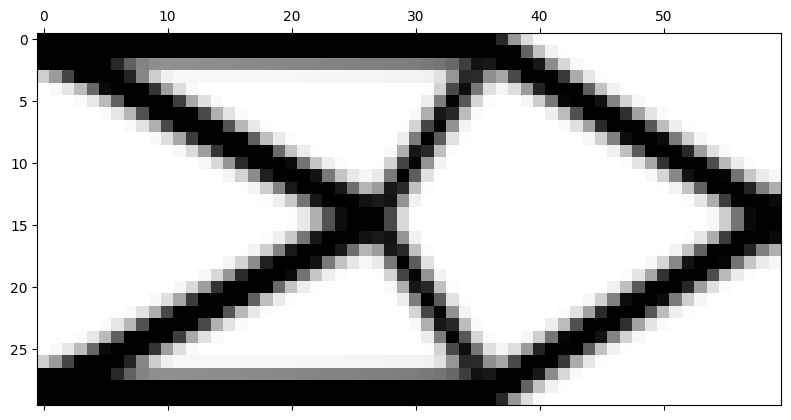

In [7]:
comp = topopt.run()
plt.matshow(-topopt.rho_phys, cmap="gray")

In [8]:
strain_energy_mat = fea.compute_strain_energy(fea.displacement)
plt.matshow(strain_energy_mat)

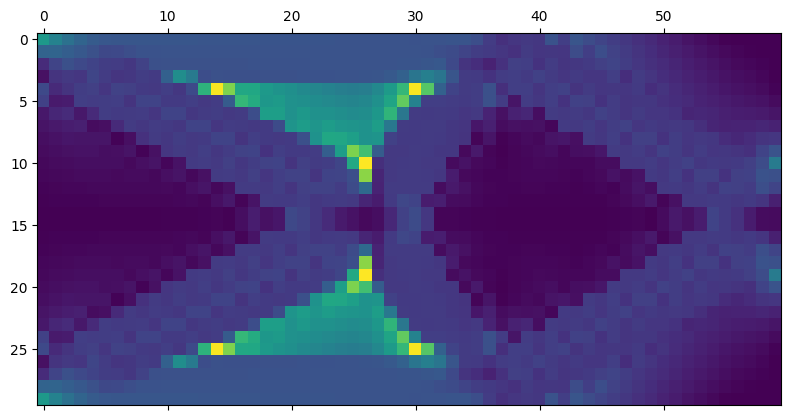

In [11]:
sigma_vm = fea.compute_von_mises_stresses(fea.displacement)
plt.matshow(sigma_vm)

In [13]:
fea.compute_compliance(fea.displacement)

117.86890068555786

In [28]:
    # unit dimensions for element
    a = 0.5
    b = 0.5
    # initialize traction to unity
    tr11 = 1
    tr22 = 1

    f0x_face1 = np.zeros(8)
    f0x_face1[[4, 6]] = tr11 * a

    f0y_face1 = np.zeros(8)
    f0y_face1[[5, 7]] = tr22 * a

    f0x_face2 = np.zeros(8)
    f0x_face2[[2, 4]] = tr11 * b

    f0y_face2 = np.zeros(8)
    f0y_face2[[3, 5]] = tr22 * b

    f0x_face3 = np.zeros(8)
    f0x_face3[[0, 2]] = tr11 * a

    f0y_face3 = np.zeros(8)
    f0y_face3[[1, 3]] = tr22 * a

    f0x_face4 = np.zeros(8)
    f0x_face4[[0, 6]] = tr11 * b

    f0y_face4 = np.zeros(8)
    f0y_face4[[1, 7]] = tr22 * b

    face_force_vecs = np.vstack((
        f0x_face1,
        f0y_face1,
        f0x_face2,
        f0y_face2,
        f0x_face3,
        f0y_face3,
        f0x_face4,
        f0y_face4,
    ))

In [27]:
np.vstack(face_force_vecs)

array([[0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5]])

In [31]:
ele_face = 2
f0x_face, f0y_face = face_force_vecs[ele_face * 2 : (ele_face + 1) * 2]

In [32]:
f0x_face

array([0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ])

In [33]:
f0y_face

array([0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ])

In [36]:
arr = np.ones((2,3))

In [37]:
arr

array([[1., 1., 1.],
       [1., 1., 1.]])

In [39]:
arr1, arr2 = arr

In [40]:
arr1

array([1., 1., 1.])

In [42]:
{
    "hej":2
}

{'hej': 2}